## **Graphing Models**

In [1]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, concatenate, BatchNormalization, Input
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, Softmax


In [2]:
# Generator
def define_generator(latent_dim, dropout_rate, num_nodes):
    """
    Outputs a generator model
    :param latent_dim: Int, dimension of latent points aka how many random numbers you want to use as input
    :param dropout_rate: float between 0 and 1, dropout rate you give to the dropout layers
    :param num_nodes: Int, number of nodes in the dense layers
    :return: a keras model
    """

    random_inputs = Input(shape=(latent_dim,))
    dense1 = Dense(num_nodes, activation='relu')(random_inputs)
    dropout1 = Dropout(dropout_rate)(dense1)
    batchNorm1 = BatchNormalization()(dropout1)
    dense2 = Dense(num_nodes, activation='relu')(batchNorm1)
    dropout2 = Dropout(dropout_rate)(dense2)
    batchNorm2 = BatchNormalization()(dropout2)
    dense3 = Dense(num_nodes, activation='relu')(batchNorm2)
    dropout3 = Dropout(dropout_rate)(dense3)
    batchNorm3 = BatchNormalization()(dropout3)
    dense4 = Dense(num_nodes, activation='relu')(batchNorm3)
    dropout4 = Dropout(dropout_rate)(dense4)
    batchNorm4 = BatchNormalization()(dropout4)
    pitch1 = Dense(num_nodes, activation='relu')(batchNorm4)
    pitch_dropoff1 = Dropout(dropout_rate)(pitch1)
    duration1 = Dense(num_nodes, activation='relu')(batchNorm4)
    dur_dropoff1 = Dropout(dropout_rate)(duration1)
    pitch2 = Dense(num_nodes, activation='relu')(pitch_dropoff1)
    duration2 = Dense(num_nodes, activation='relu')(dur_dropoff1)
    pitch = Dense(20 * 128)(pitch2)
    duration = Dense(20 * 2)(duration2)

    pitch_reshaped = Reshape((20, 128))(pitch)

    duration_reshaped = Reshape((20, 2))(duration)

    pitch_output = Softmax(axis=-1)(pitch_reshaped)

    duration_output = Dense(2, activation='relu', name='duration')(duration_reshaped)
    output_concat = concatenate([duration_output, pitch_output])
    generator = Model(inputs=random_inputs, outputs=output_concat)

    return generator

In [3]:
gen = define_generator(128, 0.2, 256)

In [4]:
from tensorflow.keras.utils import plot_model

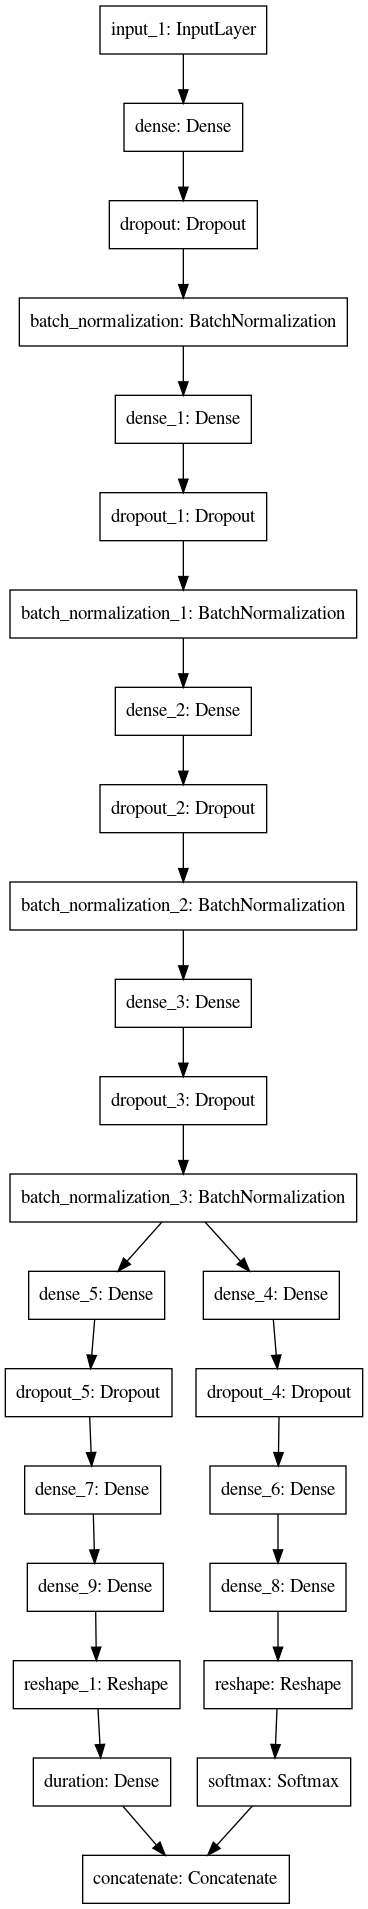

In [5]:
plot_model(gen, to_file='capstone-writing/capstone/figure/gen_model.png')

In [6]:
def define_discriminator(in_shape=(20, 130)):
    """
    Outputs a model for discriminator
    :param in_shape: shape of input
    :return: a keras model
    """
    model = Sequential()
    model.add(Input(in_shape))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model


In [7]:
discri = define_discriminator()

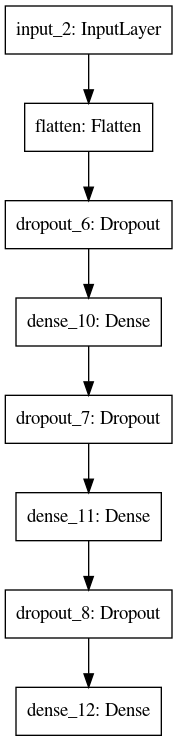

In [8]:
plot_model(discri, to_file='capstone-writing/capstone/figure/dis_model.png')

In [15]:
# Adversarial Model
def define_gan(generator, discriminator):
    """
    Outputs a GAN model
    :param generator: the generator model
    :param discriminator: the discriminator model
    :return: a keras model
    """
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [16]:
gan = define_gan(gen, discri)

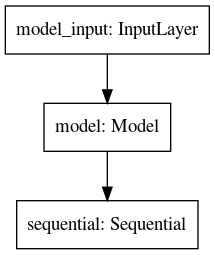

In [17]:
plot_model(gan, to_file='capstone-writing/capstone/figure/gan_model.png')